In [0]:
if 0:
  !rm -rf data*
  !rm -rf train
  !rm -rf test

  !wget https://www.dropbox.com/s/0ltu370va0p4vct/data.tgz
  !tar xzf data.tgz

In [0]:
import numpy as np
import os
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Cargar imágenes



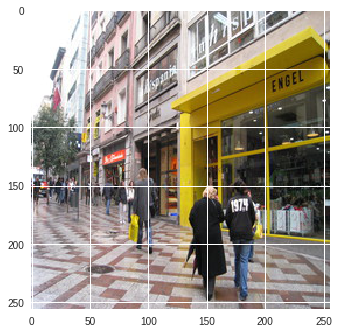

(1, 256, 256, 3)


In [93]:
X = []
for filename in os.listdir('train/'):
    img = load_img('train/'+filename)
    mgplot = plt.imshow(img)
    plt.show()
    X.append(img_to_array(img))
    break
    
X = np.array(X, dtype=float)
Xtrain = 1.0/255*X

Xtrain = Xtrain[0].reshape((1,)+Xtrain[0].shape)

print(Xtrain.shape)

Crear embeding y data generator



In [0]:
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

#Generate training data
batch_size = 1

def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        grayscaled_rgb = gray2rgb(rgb2gray(batch))
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        X_batch = X_batch.reshape(X_batch.shape+(1,))
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch, Y_batch)

In [0]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [0]:
model.compile(optimizer='adam', loss='mse')
model.fit_generator(image_a_b_gen(batch_size), epochs=100, steps_per_epoch=1)

Epoch 1/100
5/5 [==============================] - 1s 213ms/step - loss: 0.7002
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0669
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0207
Epoch 4/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0143
Epoch 5/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0129
Epoch 6/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0126
Epoch 7/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0124
Epoch 8/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0123
Epoch 9/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0117
Epoch 10/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0117
Epoch 11/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0107
Epoch 12/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0102
Epoch 13/100
5/5 [==============================

Epoch 21/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0097
Epoch 22/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0100
Epoch 23/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0096
Epoch 24/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0094
Epoch 25/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0085
Epoch 26/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0106
Epoch 27/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0102
Epoch 28/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0097
Epoch 29/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0093
Epoch 30/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0092
Epoch 31/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0087
Epoch 32/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0090
Epoch 33/100
5/5 [======================

5/5 [==============================] - 0s 64ms/step - loss: 0.0071
Epoch 42/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0073
Epoch 43/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0084
Epoch 44/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0080
Epoch 45/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0073
Epoch 46/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0064
Epoch 47/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0065
Epoch 48/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0070
Epoch 49/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0071
Epoch 50/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0071
Epoch 51/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0073
Epoch 52/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0070
Epoch 53/100
5/5 [==============================] - 0

5/5 [==============================] - 0s 61ms/step - loss: 0.0073
Epoch 62/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0061
Epoch 63/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0060
Epoch 64/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0060
Epoch 65/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0064
Epoch 66/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0066
Epoch 67/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0060
Epoch 68/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0061
Epoch 69/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0064
Epoch 70/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0062
Epoch 71/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0060
Epoch 72/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0067
Epoch 73/100
5/5 [==============================] - 0

5/5 [==============================] - 0s 62ms/step - loss: 0.0057
Epoch 82/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0057
Epoch 83/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0051
Epoch 84/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0053
Epoch 85/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0055
Epoch 86/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0054
Epoch 87/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0054
Epoch 88/100
5/5 [==============================] - 0s 60ms/step - loss: 0.0063
Epoch 89/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0055
Epoch 90/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0053
Epoch 91/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0057
Epoch 92/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0060
Epoch 93/100
5/5 [==============================] - 0

Probar el modelo con imagenes de test


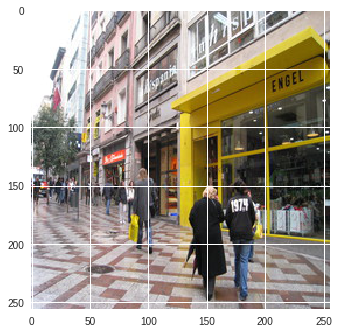

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


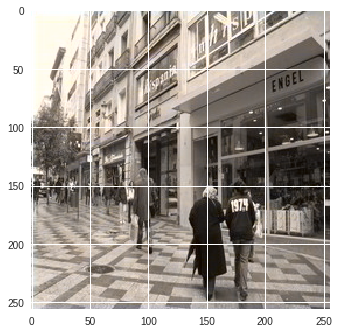

In [90]:
color_me  = []
for filename in os.listdir('train/'):
    img = load_img('train/'+filename)
    mgplot = plt.imshow(img)
    plt.show()
    color_me.append(img_to_array(img))
    break
color_me = np.array(color_me, dtype=float)
color_me = 1.0/255*color_me
color_me = gray2rgb(rgb2gray(color_me))
color_me = rgb2lab(color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

color_me = color_me[0].reshape((1,)+color_me[0].shape)

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result/img_"+str(i)+".png", lab2rgb(cur))
    img = lab2rgb(cur)
    mgplot = plt.imshow(img)
    plt.show()
    